In [59]:
import numpy as np
a = np.array([[[1,2], [3, 4]], [[5, 6], [7, 8]]])
print(a[:,:])
f = lambda x: x[0] + x[1]
print(np.array([ f(x) for x in a]))
b = np.array([1, 1, 1])
print(b * 0)

median_b = 4
c = np.array([[1, 2, 3], [4, 5, 6]])
def g(x):
    if x[1] < median_b:
        print("less", x[1])
        print(median_b)
        return [0, 0, 0]
    else:
        print("more", x[1])
        return x
print(np.array([g(x) for x in c[:]]))

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
[[ 4  6]
 [12 14]]
[0 0 0]
less 2
4
more 5
[[0 0 0]
 [4 5 6]]


(1080, 1920, 3)
255 0
215.0 198 176.0


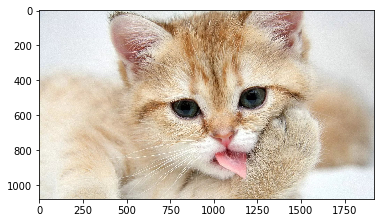

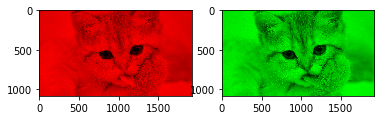

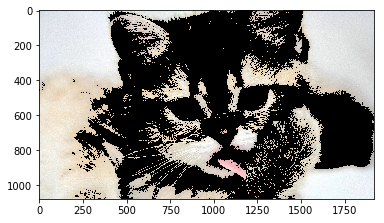

In [47]:
#task 1
import skimage
from skimage import data
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

image = io.imread('cat.jpg')
image_r = image.copy()
print(image_r.shape)
image_r[:, :, 1] = 0
image_r[:, :, 2] = 0

image_g = np.zeros_like(image)
image_g[:, :, 1] = image[:, :, 1]

max_r = image[:, :, 0].max()
min_r = image[:, :, 0].min()
print(max_r, min_r)

median_r = np.median(image[:,:,0])
median_g = int(np.median(image[:,:,1]))
median_b = np.median(image[:,:,2])
print(median_r, median_g, median_b)

#medians = np.median(np.median(image, axis=0), axis=0)
#print(medians)

#def f(x):
#    print(x.shape)
#    if x[2] < median_b:
#        return [0, 0, 0]
#    else:
#        return x

#new_image = np.array([f(x) for x in image[:, :, :]])
#print(new_image)
new_image = image.copy()
for r in new_image:
    for p in r:
        if p[2] < median_b:
            p*=0

plt.figure()
plt.imshow(image)
plt.figure()
plt.subplot(121)
plt.imshow(image_r)
plt.subplot(122)
plt.imshow(image_g)
plt.figure()
plt.imshow(new_image)

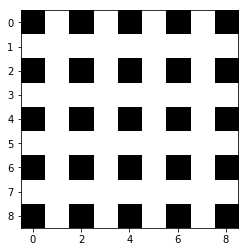

In [2]:
#task 2
import numpy as np
check = np.zeros((9, 9))
check[:, 1::2] = 1
check[1::2, ::2] = 1
import matplotlib.pyplot as plt
plt.imshow(check, cmap='gray', interpolation='nearest')

In [3]:
#task 3
import skimage
from skimage import io
import os
filename = os.path.join(skimage.data_dir, 'camera.png')
camera = io.imread(filename)
logo = io.imread('https://scikit-image.org/_static/img/logo.png')
io.imsave('local_logo.png', logo)

from skimage import img_as_float
camera_float = img_as_float(camera)
print(camera.max(), camera_float.max())

from skimage import filters
camera_sobel = filters.sobel(camera)
print(camera_sobel.max())

import scipy
face = scipy.misc.face()
print(face.shape)

255 1.0
0.5915023652179584
(768, 1024, 3)


[[0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[0 0 0 0 0]
 [0 0 1 0 0]
 [0 1 1 1 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]


E:\Anaconda\Anaconda3\lib\site-packages\skimage\restoration\_denoise.py:226: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  g[slices_g] = np.diff(out, axis=ax)
E:\Anaconda\Anaconda3\lib\site-packages\skimage\restoration\_denoise.py:212: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  d[slices_d] += p[slices_p]


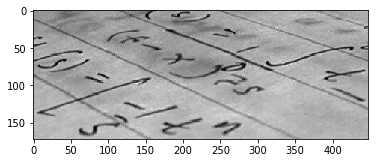

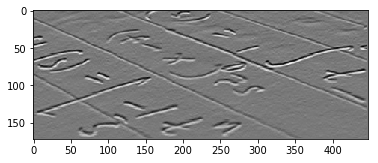

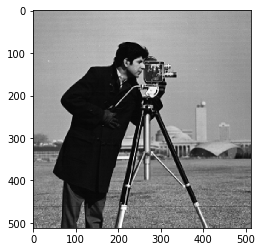

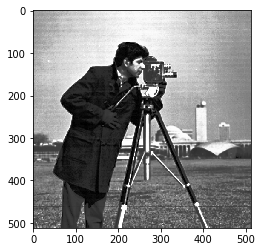

In [12]:
#task 4
import numpy as np
from matplotlib import pyplot as plt
from skimage import data
text = data.text()
hsobel_text = filters.sobel_h(text)
plt.figure()
plt.imshow(text, cmap='gray')
plt.figure()
plt.imshow(hsobel_text, cmap='gray')

from skimage import exposure
camera = data.camera()
camera_equalized = exposure.equalize_hist(camera)
plt.figure()
plt.imshow(camera, cmap='gray')
plt.figure()
plt.imshow(camera_equalized, cmap='gray')

from skimage import morphology
a = np.zeros((7, 7), dtype=np.uint8)
a[1:6, 2:5] = 1
print(a)
b = morphology.binary_erosion(a, morphology.diamond(1)).astype(np.uint8)
print(b)

a = np.zeros((5, 5), dtype=np.uint8)
a[2, 2] = 1
print(a)
b = morphology.binary_dilation(a, morphology.diamond(1)).astype(np.uint8)
print(b)

from skimage.morphology import disk
from skimage import filters
coins = data.coins()
coins_zoom = coins[10:80, 300:370]
median_coins = filters.median(coins_zoom, disk(1))
from skimage import restoration
tv_coins = restoration.denoise_tv_chambolle(coins_zoom, weight=0.1)
gaussian_coins = filters.gaussian(coins_zoom, sigma=2)

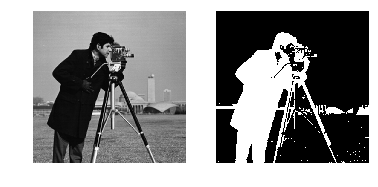

In [51]:
#task 5
from skimage import data
from skimage import filters
camera = data.camera()
val = filters.threshold_otsu(camera)
mask = camera < val
plt.figure()
plt.subplot(121), plt.axis('off')
plt.imshow(camera, cmap='gray')
plt.subplot(122), plt.axis('off')
plt.imshow(mask, cmap='gray')

import numpy as np
n=20
l=256
im=np.zeros((l,l))
points=l*np.random.random((2, n ** 2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = filters.gaussian(im, sigma = l / (4. * n))
blobs = im > im.mean()

from skimage import measure
all_labels = measure.label(blobs)
blobs_labels = measure.label(blobs, background=0)
#visualization!!!

In [55]:
#task 6
from skimage import morphology
from skimage.feature import peak_local_max

x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1) ** 2 + (y - y1) ** 2 < r1 ** 2
mask_circle2 = (x - x2) ** 2 + (y - y2) ** 2 < r2 ** 2
image = np.logical_or(mask_circle1, mask_circle2)

from scipy import ndimage
distance = ndimage.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=image)
markers = morphology.label(local_maxi)
labels_ws = morphology.watershed(-distance, markers, mask=image)

E:\Anaconda\Anaconda3\lib\site-packages\skimage\util\arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


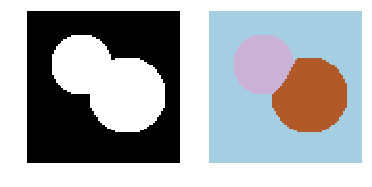

In [56]:
#task 7
from skimage import segmentation
markers[~image] = -1
labels_rw = segmentation.random_walker(image, markers)
plt.figure()
plt.subplot(121)
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.subplot(122)
plt.axis('off')
plt.imshow(labels_rw, cmap='Paired')